## Analyzing Marketing Campaigns

## Introduction




This Jupyter Notebook provides an analysis of marketing campaigns. It aims to explore and evaluate the effectiveness of various marketing strategies and tactics employed by a company. By analyzing key metrics and performance indicators, this notebook helps in understanding the impact of marketing campaigns on business outcomes.

The notebook includes data preprocessing, exploratory data analysis, visualization, and statistical analysis techniques to gain insights into the effectiveness of marketing campaigns. It also provides recommendations and actionable insights for optimizing future marketing efforts.





## about the dataset:
##### the dataset contains data about a company's marketing campaigns, it has 10,037 rows and 12 columns
* user_id: unique ID of the customer
* date_served: date that a marketing experiment was served to a user
* marketing_channel: marketing channel that the user first experienced
* variant: marketing experiment that was served to a user
* converted: flag indicating whether the user converted (i.e. bought the product) or not
* language_displayed: language that was displayed to the user
* language_preferred: language that the user preferred
* age_group: age group of the user
* date_subscribed: date that the user subscribed for the product
* date_canceled: date that the user canceled the subscription
* subscribing_channel: marketing channel that led to the subscription
* is_retained: flag indicating whether the user was retained as a subscriber   


# Import and Examine the Dataset

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import marketing.csv 
marketing = pd.read_csv('marketing.csv', parse_dates=['date_served', 'date_subscribed', 'date_canceled'])

In [3]:
# Print the first five rows of the DataFrame
marketing.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True


In [4]:
# Check column data types and non-missing values
print(marketing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              10037 non-null  object        
 1   date_served          10021 non-null  datetime64[ns]
 2   marketing_channel    10022 non-null  object        
 3   variant              10037 non-null  object        
 4   converted            10022 non-null  object        
 5   language_displayed   10037 non-null  object        
 6   language_preferred   10037 non-null  object        
 7   age_group            10037 non-null  object        
 8   date_subscribed      1856 non-null   datetime64[ns]
 9   date_canceled        577 non-null    datetime64[ns]
 10  subscribing_channel  1856 non-null   object        
 11  is_retained          1856 non-null   object        
dtypes: datetime64[ns](3), object(9)
memory usage: 941.1+ KB
None


In [5]:
# Mapping for channels
channel_dict = {"House Ads": 1, "Instagram": 2, 
                "Facebook": 3, "Email": 4, "Push": 5}

# Map the channel to a channel code
marketing['channel_code'] = marketing['subscribing_channel'].map(channel_dict)

add a new column 'is_correct_lang' to the DataFrame so that it contains yes if the language displayed to the user is the same as the preferred language of the user, and no otherwise.

In [6]:
# Add the new column is_correct_lang
marketing['is_correct_lang'] = np.where(
    marketing['language_preferred'] == marketing['language_displayed'], 'Yes', 'No')

In [7]:
# extract day of the week from date_subscribed column
marketing['DoW'] = marketing['date_subscribed'].dt.dayofweek

Exploratory data analysis

In [8]:
marketing.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,channel_code,is_correct_lang,DoW
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0


In [9]:
# how many users saw the marketing assets?
users = marketing['user_id'].nunique()
print(users)

7309


In [10]:
# how many unique users saw the marketing assets per day?
daily_users = marketing.groupby(['date_served'])['user_id'].nunique()
daily_users

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
2018-01-06    308
2018-01-07    275
2018-01-08    312
2018-01-09    312
2018-01-10    337
2018-01-11    310
2018-01-12    301
2018-01-13    306
2018-01-14    305
2018-01-15    767
2018-01-16    388
2018-01-17    369
2018-01-18    318
2018-01-19    305
2018-01-20    311
2018-01-21    229
2018-01-22    178
2018-01-23    172
2018-01-24    190
2018-01-25    184
2018-01-26    222
2018-01-27    320
2018-01-28    320
2018-01-29    319
2018-01-30    317
2018-01-31    340
Name: user_id, dtype: int64

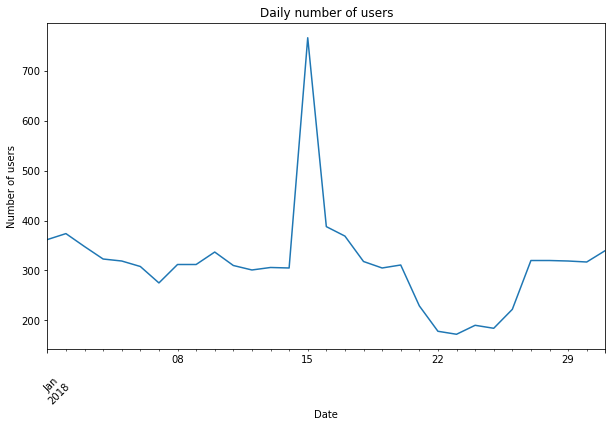

In [11]:
# plot daily_users
daily_users.plot(figsize=(10, 6))
plt.title('Daily number of users')
plt.ylabel('Number of users')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.show()

* there's a large peak in the number of users on 2018-01-15 , there are 767 users saw the marketing assets on that day

## common marketing metrics

##### there are common marketing metrics that are used to measure the effectiveness of marketing campaigns.
 There metrics include:
- conversion rate : the percentage of users who saw the marketing assets and subscribed to the product.
- retention rate : the percentage of users who remained subscribed to the product after a certain period of time.
* conversion rate = number of users who subscribed / number of users who saw the marketing assets
* retention rate = number of users who remained subscribed / number of users who subscribed


### Calculating conversion rate

In [12]:
subscribers = marketing[marketing['converted'] == True]['user_id'].nunique()
total = marketing['user_id'].nunique()
conversion_rate = subscribers/total

print('conversion rate is: ',round(conversion_rate*100, 2), '%')

conversion rate is:  13.89 %


### Calculating retention rate

In [13]:
retained = marketing[marketing['is_retained'] == True]['user_id'].nunique()
retention_rate = retained/subscribers

print('retention rate is: ',round(retention_rate*100, 2), '%')

retention rate is:  66.8 %


### conversion rate by marketing_channel

In [14]:
# calculate the conversion rate by marketing channel
subscribers_channel = marketing[marketing['converted'] == True].groupby(['marketing_channel'])['user_id'].nunique()
total_by_channel = marketing.groupby(['marketing_channel'])['user_id'].nunique()
conversion_rate_channel = round(subscribers_channel/total_by_channel *100,2)
conversion_rate_channel


marketing_channel
Email        33.82
Facebook     12.57
House Ads     7.51
Instagram    13.33
Push          7.92
Name: user_id, dtype: float64

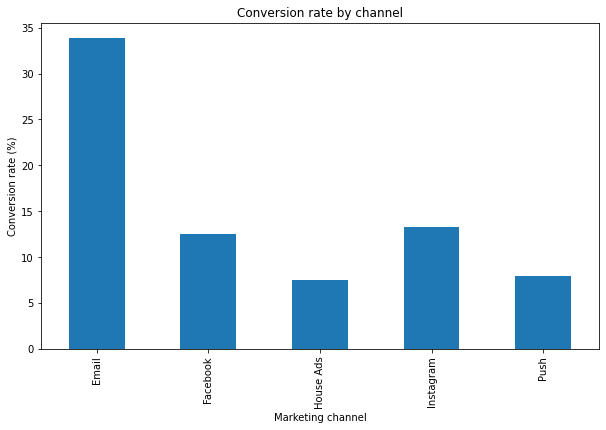

In [15]:
# plot the conversion rate by marketing channel
conversion_rate_channel.plot(kind='bar', figsize=(10, 6))
plt.title('Conversion rate by channel')
plt.ylabel('Conversion rate (%)')
plt.xlabel('Marketing channel')
plt.show()


* Email has the highest conversion rate, followed by instagram and facebook.

#### instead of calculating the conversion rate repetedly, we can create a function to calculate the conversion rate for any case we want

In [16]:
# define a function to calculate the conversion for any group of columns

def conversion_rate(dataframe, column_names):
    # Total number of converted users
    column_conv = dataframe[dataframe['converted']==True].groupby(column_names)['user_id'].nunique()

    # Total number users
    column_total = dataframe.groupby(column_names)['user_id'].nunique()  
    
    # Conversion rate 
    conversion_rate = column_conv/column_total*100
    
    # Fill missing values with 0
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate

## conversion rate by language displayed

In [17]:

language_conversion = conversion_rate(marketing, ['language_displayed'])
language_conversion

language_displayed
Arabic     50.000000
English    12.916725
German     71.621622
Spanish    20.000000
Name: user_id, dtype: float64

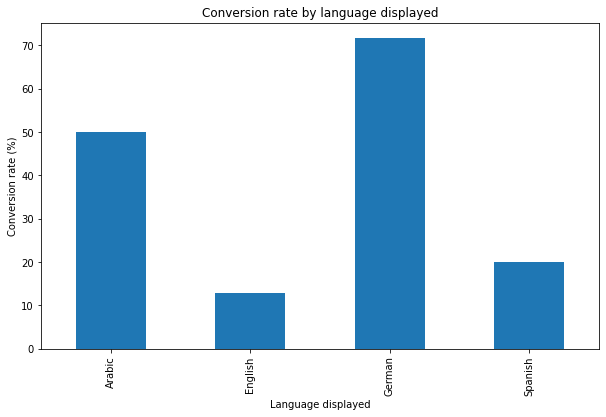

In [18]:
# plot the conversion rate by language displayed
language_conversion.plot(kind='bar', figsize=(10, 6))
plt.title('Conversion rate by language displayed')
plt.ylabel('Conversion rate (%)')
plt.xlabel('Language displayed')
plt.show()

* This plot shows that German and Arabic speakers have much higher conversion rates than English and Spanish speakers.

## conversion rate by date served

In [19]:
conversion_by_date_served = conversion_rate(marketing, ['date_served'])
conversion_by_date_served

date_served
2018-01-01     9.944751
2018-01-02     9.893048
2018-01-03    10.344828
2018-01-04    10.835913
2018-01-05    12.539185
2018-01-06    11.363636
2018-01-07    14.181818
2018-01-08    11.538462
2018-01-09    12.500000
2018-01-10    11.869436
2018-01-11     8.064516
2018-01-12     7.641196
2018-01-13     8.496732
2018-01-14     8.524590
2018-01-15    11.342894
2018-01-16    25.515464
2018-01-17    21.951220
2018-01-18     9.119497
2018-01-19     5.901639
2018-01-20     6.752412
2018-01-21     8.733624
2018-01-22    12.359551
2018-01-23    12.209302
2018-01-24    11.578947
2018-01-25    12.500000
2018-01-26     9.009009
2018-01-27     6.562500
2018-01-28     6.250000
2018-01-29     5.956113
2018-01-30     6.624606
2018-01-31     5.294118
Name: user_id, dtype: float64

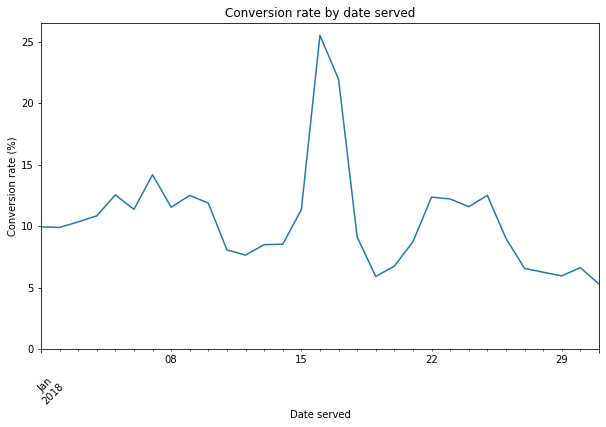

In [20]:
# plot the conversion rate by date served
conversion_by_date_served.plot(figsize=(10, 6))
plt.title('Conversion rate by date served')
plt.ylabel('Conversion rate (%)')
plt.xlabel('Date served')
# Set the y-axis to begin at 0
plt.ylim(0)
plt.xticks(rotation=45)
# Display the plot
plt.show()

* from the plot above, we can see that the conversion rate is relatively steady except for one day in January.
* the conversion rate is very high on 2018-01-16 and 2018-01-17, this is because there are many users saw the marketing assets on 2018-01-15.


In [21]:
# calculate retention rate by date subscribed
retained_by_date = marketing[marketing['is_retained'] == True].groupby(['date_subscribed'])['user_id'].nunique()
#subscribers_by_date_subscribed = marketing[marketing['converted'] == True].groupby(['date_subscribed'])['user_id'].nunique()
total_by_date_subscribed = marketing.groupby(['date_subscribed'])['user_id'].nunique()
retention_rate_by_date = round(retained_by_date/total_by_date_subscribed *100,2)
retention_rate_by_date

date_subscribed
2018-01-01    77.78
2018-01-02    70.27
2018-01-03    72.97
2018-01-04    50.00
2018-01-05    57.50
2018-01-06    75.68
2018-01-07    52.63
2018-01-08    63.89
2018-01-09    67.50
2018-01-10    68.29
2018-01-11    61.54
2018-01-12    39.13
2018-01-13    50.00
2018-01-14    61.54
2018-01-15    71.43
2018-01-16    70.19
2018-01-17    61.63
2018-01-18    73.33
2018-01-19    68.42
2018-01-20    80.95
2018-01-21    76.19
2018-01-22    77.27
2018-01-23    71.43
2018-01-24    65.22
2018-01-25    56.52
2018-01-26    80.00
2018-01-27    57.14
2018-01-28    66.67
2018-01-29    75.00
2018-01-30    71.43
2018-01-31    66.67
Name: user_id, dtype: float64

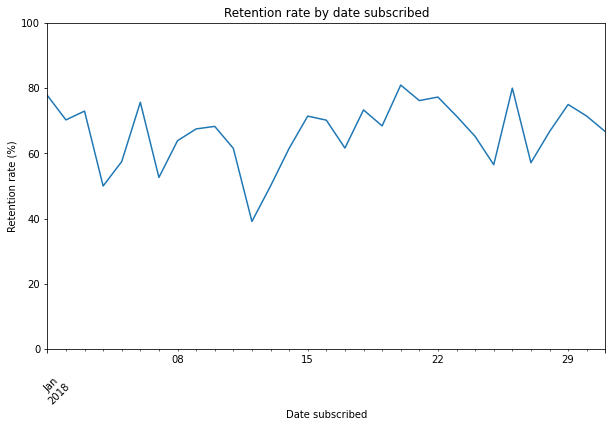

In [22]:
# plot the retention rate by date subscribed
retention_rate_by_date.plot(figsize=(10, 6))
plt.title('Retention rate by date subscribed')
plt.ylabel('Retention rate (%)')
plt.ylim(0,100)
plt.xlabel('Date subscribed')
plt.xticks(rotation=45)
plt.show()

In [23]:
# date_served and language_preferred
language_preferred = marketing.groupby(['date_served', 'language_preferred'])['user_id'].count()
language_preferred.head()

date_served  language_preferred
2018-01-01   Arabic                  4
             English               355
             German                  5
             Spanish                11
2018-01-02   Arabic                  4
Name: user_id, dtype: int64

In [24]:
# convert the results to a DataFrame
language_preferred_df = pd.DataFrame(language_preferred.unstack(level=1))
language_preferred_df.head()

language_preferred,Arabic,English,German,Spanish
date_served,,,,
2018-01-01,4.0,355.0,5.0,11.0
2018-01-02,4.0,397.0,6.0,10.0
2018-01-03,3.0,374.0,3.0,8.0
2018-01-04,2.0,318.0,2.0,14.0
2018-01-05,1.0,314.0,2.0,14.0


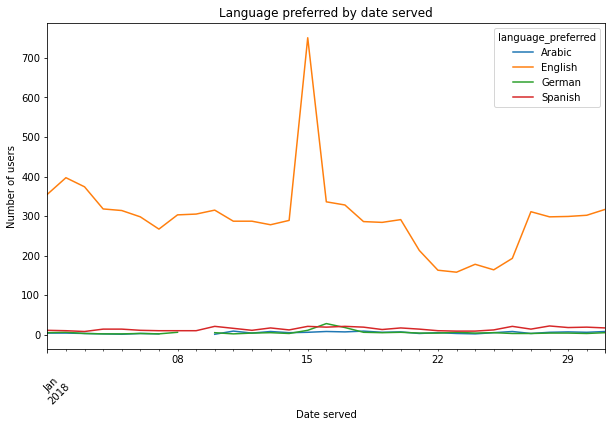

In [25]:
language_preferred_df.plot(figsize=(10, 6))
plt.title('Language preferred by date served')
plt.ylabel('Number of users')
plt.xlabel('Date served')
plt.xticks(rotation=45)
plt.show()

#### as we can see the most users preferred language is English and the second is Arabic, let's check the conversion rate by language preferred

In [26]:
language_preferred_conversion = conversion_rate(marketing, ['language_preferred'])
language_preferred_conversion

language_preferred
Arabic     17.924528
English    13.250000
German     45.038168
Spanish    11.076923
Name: user_id, dtype: float64

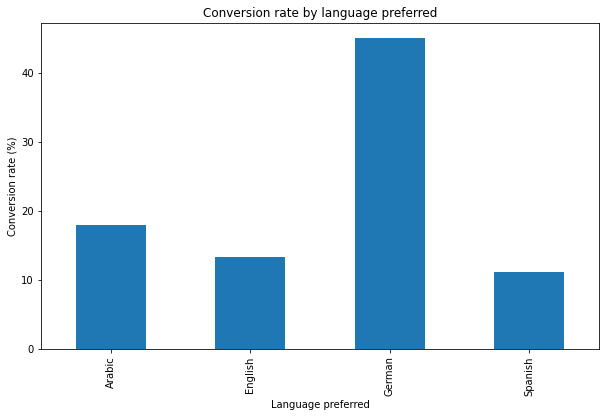

In [27]:
# plot the conversion rate by language preferred
language_preferred_conversion.plot(kind='bar', figsize=(10, 6))
plt.title('Conversion rate by language preferred')
plt.ylabel('Conversion rate (%)')
plt.xlabel('Language preferred')
plt.show()

* from the plot above, we can see that the conversion rate is higher for german and arabic users.

In [28]:
# language prefered by age_group
language_age = marketing.groupby(['language_preferred', 'age_group'])['user_id'].count()
language_age.unstack(1)

age_group,0-18 years,19-24 years,24-30 years,30-36 years,36-45 years,45-55 years,55+ years
language_preferred,,,,,,,
Arabic,19,26,19,19,19,21,22
English,1421,1560,1442,1251,1260,1240,1101
German,31,29,35,16,19,25,12
Spanish,68,67,72,69,55,67,52


<AxesSubplot:xlabel='language_preferred'>

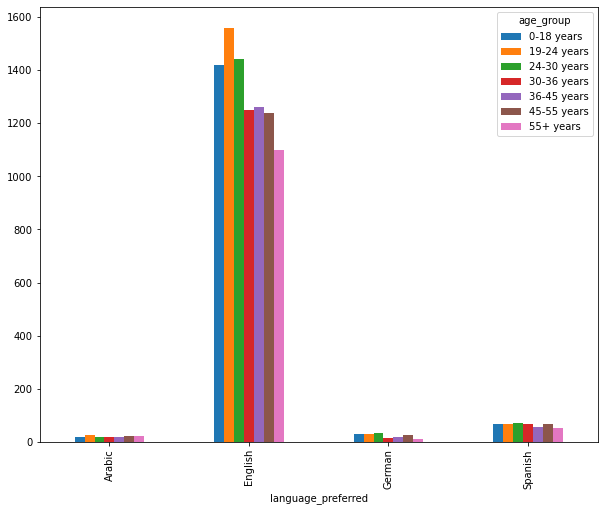

In [29]:
language_age.unstack(level=1).plot(kind='bar', figsize=(10,8))

In [30]:
# Marketing channels across age groups
# calculate the number of users by age_group and marketing_channel
age_group_channel = marketing.groupby(['age_group', 'marketing_channel'])['user_id'].count()
age_group_channel.head()

age_group   marketing_channel
0-18 years  Email                 93
            Facebook             264
            House Ads            694
            Instagram            300
            Push                 186
Name: user_id, dtype: int64

In [31]:
# unstack age_group_channel and transform it into a DataFrame
age_group_channel_df = pd.DataFrame(age_group_channel.unstack(level=0))
age_group_channel_df.head()

age_group,0-18 years,19-24 years,24-30 years,30-36 years,36-45 years,45-55 years,55+ years
marketing_channel,,,,,,,
Email,93,111,120,60,63,65,53
Facebook,264,347,296,249,226,299,179
House Ads,694,761,681,699,589,678,631
Instagram,300,315,286,259,280,227,204
Push,186,145,183,86,193,82,118


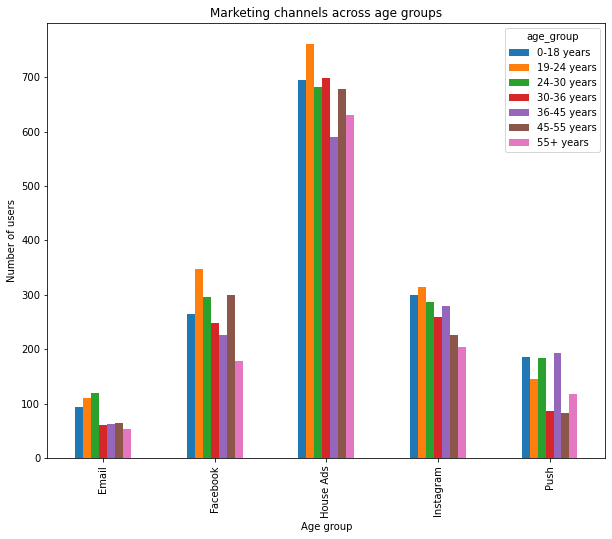

In [32]:
# plot age_group_channel
age_group_channel_df.plot(kind='bar', figsize=(10, 8))
plt.title('Marketing channels across age groups')
plt.ylabel('Number of users')
plt.xlabel('Age group')
plt.show()

 As you can see, email is not reaching older age groups, and Facebook is not reaching many people under 18. also, facebook is the most popular channel for users between 18 and 24 years old. 
* instagram and facebook has more reach to users between 18 and 24 years old.
* house ads are the most popular channel across all age groups.
* email is the least popular channel across all age groups.


In [33]:
# Calculate conversion rate by age_group
age_group_conv = conversion_rate(marketing, ['date_served', 'age_group'])
age_group_conv


date_served  age_group  
2018-01-01   0-18 years     15.517241
             19-24 years    19.672131
             24-30 years    10.526316
             30-36 years     4.081633
             36-45 years     4.255319
                              ...    
2018-01-31   24-30 years     5.769231
             30-36 years     0.000000
             36-45 years     3.508772
             45-55 years     2.325581
             55+ years       2.631579
Name: user_id, Length: 217, dtype: float64

In [34]:
# Unstack and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level=1))
age_group_df.head() 

age_group,0-18 years,19-24 years,24-30 years,30-36 years,36-45 years,45-55 years,55+ years
date_served,,,,,,,
2018-01-01,15.517241,19.672131,10.526316,4.081633,4.255319,2.222222,8.695652
2018-01-02,18.032787,16.438356,11.475410,4.000000,4.347826,4.347826,2.439024
2018-01-03,10.204082,20.895522,15.094340,4.255319,6.000000,4.761905,4.347826
2018-01-04,11.764706,20.000000,18.367347,4.545455,4.347826,6.122449,7.317073
2018-01-05,14.285714,25.000000,13.636364,9.090909,6.818182,4.651163,8.888889


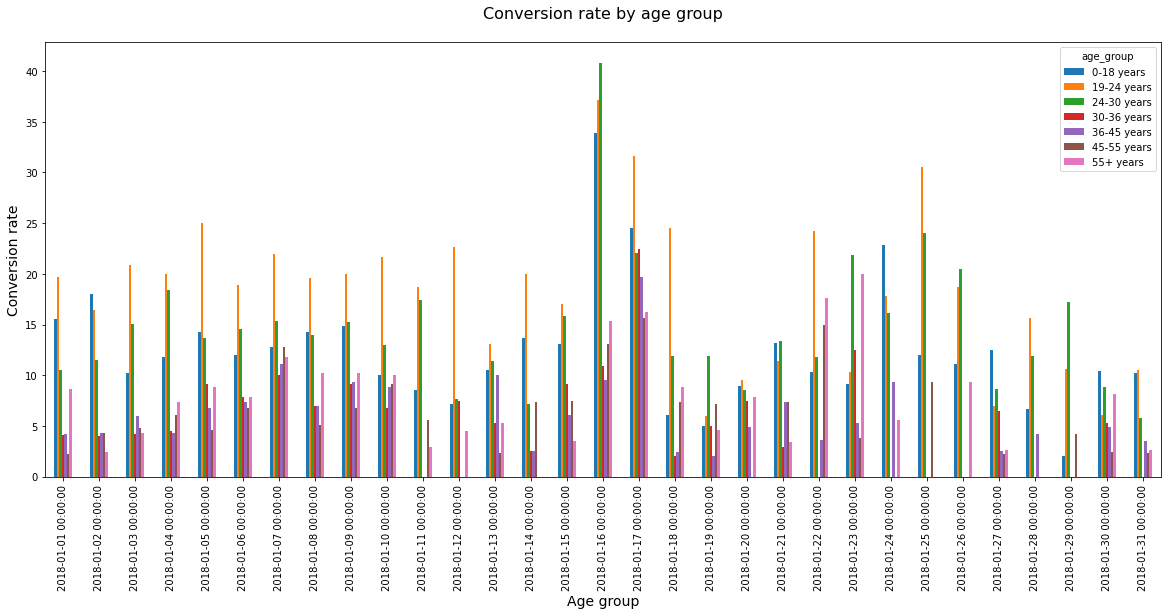

In [35]:
# Visualize conversion by age_group
age_group_df.plot(kind='bar', figsize=(20, 8))
plt.title('Conversion rate by age group\n', size = 16)
plt.ylabel('Conversion rate', size = 14)
plt.xlabel('Age group', size = 14)
plt.show()

* from the plot above, we can see that the conversion rate is higher for users between 18 and 24 years old and users between 25 and 30 years old.
* the conversion rate is lower for users older than 30 years old.

In [36]:
# define a function to plot conversion rate column by column
def plotting_conv(dataframe):
    for column in dataframe:
        # Plot column by dataframe's index
        plt.plot(dataframe.index, dataframe[column])
        plt.title('Daily ' + str(column) + ' conversion rate\n', 
                  size = 16)
        plt.ylabel('Conversion rate', size = 14)
        plt.xlabel('Date', size = 14)
        plt.xticks(rotation=45)
        # Show plot
        plt.show()
        plt.clf()

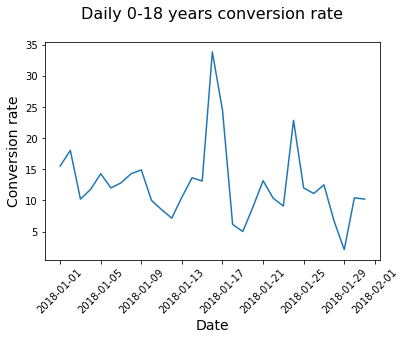

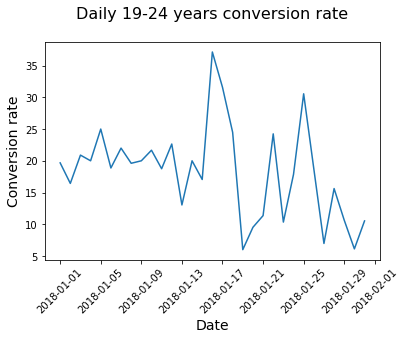

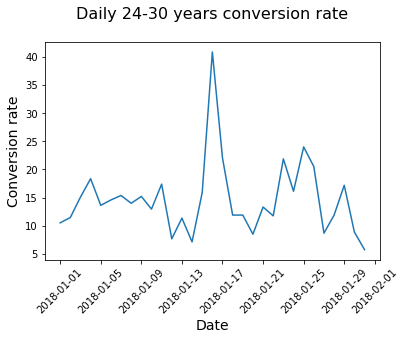

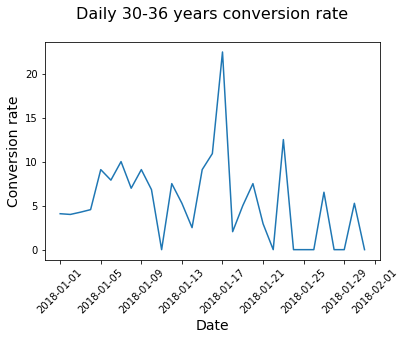

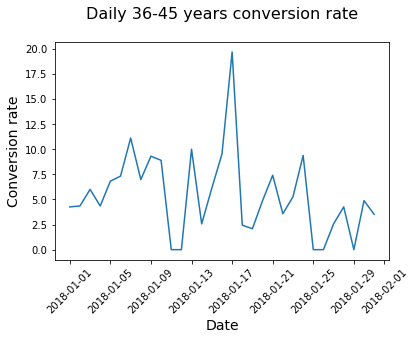

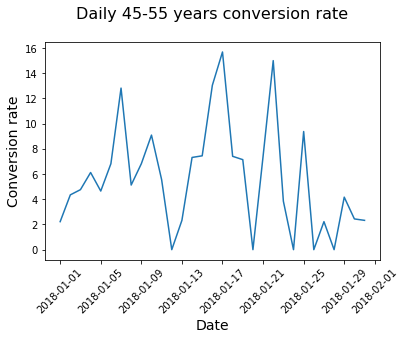

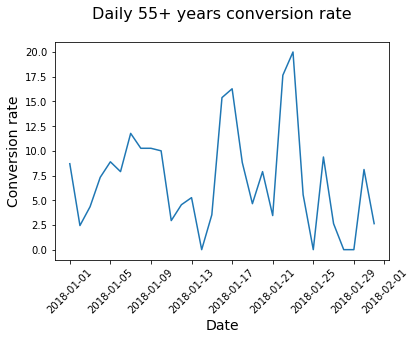

<Figure size 432x288 with 0 Axes>

In [37]:
plotting_conv(age_group_df)

In [38]:
# Calculate conversion rate by date served and channel
daily_conv_channel = conversion_rate(marketing,['date_served','marketing_channel'])

print(daily_conv_channel.head())

date_served  marketing_channel
2018-01-01   Email                100.000000
             Facebook              11.764706
             House Ads              8.465608
             Instagram             10.666667
             Push                   8.333333
Name: user_id, dtype: float64


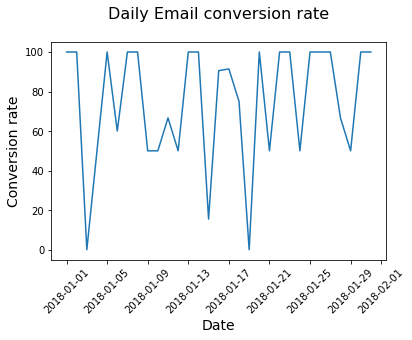

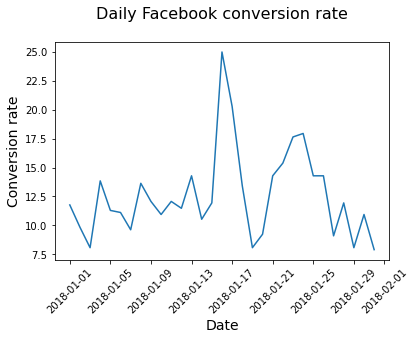

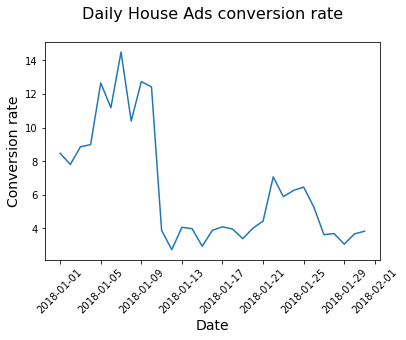

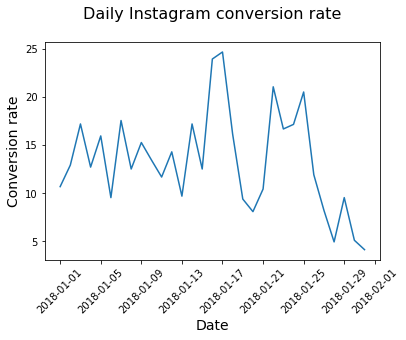

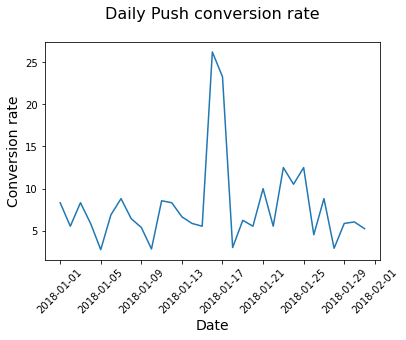

<Figure size 432x288 with 0 Axes>

In [39]:
# Unstack daily_conv_channel and convert it to a DataFrame
daily_conv_channel = pd.DataFrame(daily_conv_channel.unstack(level = 1))

# Plot results of daily_conv_channel
plotting_conv(daily_conv_channel)

* as we can see from the plot above, the conversion rate in house ads has a sharp drop on 2018-01-11, let's check the reason

In [40]:
# Add day of week column to marketing
marketing['DoW_served'] = marketing['date_served'].dt.dayofweek



In [41]:
# Calculate conversion rate by day of week
DoW_conversion = conversion_rate(marketing, ['DoW_served', 'marketing_channel'])
DoW_conversion

DoW_served  marketing_channel
0.0         Email                16.262136
            Facebook             11.960133
            House Ads             6.265985
            Instagram            12.251656
            Push                  6.451613
1.0         Email                90.625000
            Facebook             14.788732
            House Ads             7.031250
            Instagram            15.194346
            Push                 11.585366
2.0         Email                83.720930
            Facebook             12.703583
            House Ads             7.526882
            Instagram            15.015974
            Push                 10.588235
3.0         Email                72.727273
            Facebook             13.333333
            House Ads             5.903399
            Instagram            14.349776
            Push                  6.779661
4.0         Email                66.666667
            Facebook             11.013216
            House Ads   

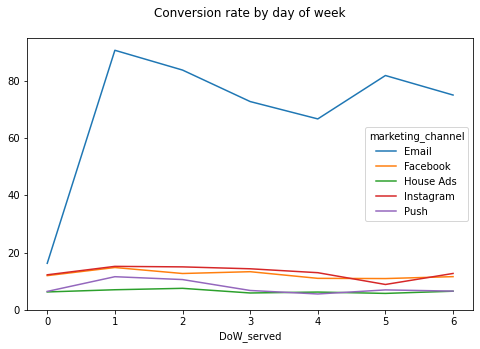

In [42]:
# Unstack channels
DoW_df = pd.DataFrame(DoW_conversion.unstack(level=1))

# Plot conversion rate by day of week
DoW_df.plot(figsize=(8, 5))
plt.title('Conversion rate by day of week\n')
plt.ylim(0)
plt.show()

* As you can see, email is particularly high and may be reflective of a tracking error,but house ads appear stable across the week with a slight peak on Tuesday. You will investigate further

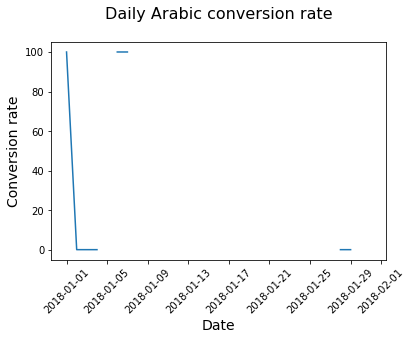

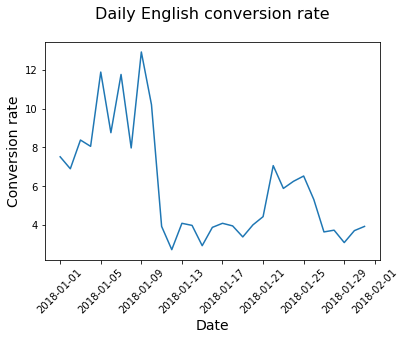

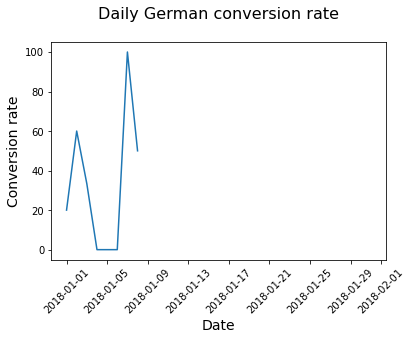

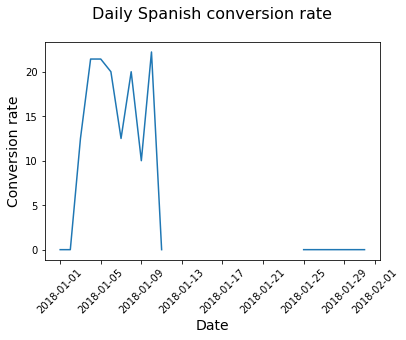

<Figure size 432x288 with 0 Axes>

In [43]:
# Subset the rows where marketing channel is House Ads
house_ads = marketing[marketing['marketing_channel']=='House Ads']

# Calculate conversion by date served, and language displayed
conv_lang_channel = conversion_rate(house_ads,['date_served','language_displayed'])

# Unstack conv_lang_channel
conv_lang_df = pd.DataFrame(conv_lang_channel.unstack(level=1))

# Use your plotting function to display results
plotting_conv(conv_lang_df)

* English conversion rate drops around the 11th, and there do not appear to be ads served in other languages for a two week period. we will investigate further.

In [44]:
# langage prefered are not the same for some users, let's check how many users are affected
language_check = marketing[marketing['is_correct_lang'] == 'No']['user_id'].nunique()
total = marketing['user_id'].nunique()  
language_check_rate = language_check/total
print(round(language_check_rate*100, 2), '%')

5.51 %


* there are 5.51% users are affected by the language issue, let's check the conversion rate for these users

In [45]:
# we will Group house_ads dataset by `date_served`` and `correct_language` and count the number of user_id
language_check = house_ads.groupby(['date_served','is_correct_lang'])['user_id'].count()

# Unstack language_check and fill missing values with 0's
language_check_df = pd.DataFrame(language_check.unstack(level=1)).fillna(0)

# Print results
print(language_check_df)

is_correct_lang    No    Yes
date_served                 
2018-01-01        2.0  189.0
2018-01-02        3.0  247.0
2018-01-03        0.0  220.0
2018-01-04        0.0  168.0
2018-01-05        0.0  160.0
2018-01-06        1.0  151.0
2018-01-07        2.0  130.0
2018-01-08        0.0  154.0
2018-01-09        0.0  157.0
2018-01-10        0.0  170.0
2018-01-11       20.0  135.0
2018-01-12       18.0  130.0
2018-01-13       26.0  122.0
2018-01-14       20.0  131.0
2018-01-15       16.0  192.0
2018-01-16       28.0  127.0
2018-01-17       21.0  127.0
2018-01-18       31.0  121.0
2018-01-19       22.0  127.0
2018-01-20       28.0  124.0
2018-01-21       14.0  100.0
2018-01-22       13.0   72.0
2018-01-23       16.0   69.0
2018-01-24       13.0   83.0
2018-01-25       19.0   74.0
2018-01-26       24.0   92.0
2018-01-27       18.0  149.0
2018-01-28       28.0  136.0
2018-01-29       24.0  142.0
2018-01-30       23.0  145.0
2018-01-31       23.0  135.0


In [46]:
# add a colun to language_check_df to calculate the percentage of users who were not shown the correct language
language_check_df['pct'] = language_check_df['Yes']/language_check_df.sum(axis=1)*100
language_check_df

is_correct_lang,No,Yes,pct
date_served,,,
2018-01-01,2.0,189.0,98.952880
2018-01-02,3.0,247.0,98.800000
2018-01-03,0.0,220.0,100.000000
2018-01-04,0.0,168.0,100.000000
2018-01-05,0.0,160.0,100.000000
2018-01-06,1.0,151.0,99.342105
2018-01-07,2.0,130.0,98.484848
2018-01-08,0.0,154.0,100.000000
2018-01-09,0.0,157.0,100.000000


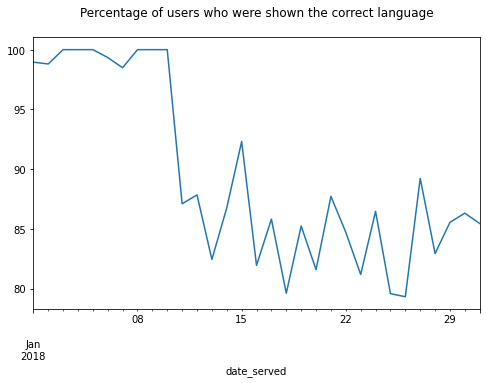

In [47]:
# plot the percentage of users who were shown the correct language
language_check_df['pct'].plot(figsize=(8, 5))
plt.title('Percentage of users who were shown the correct language\n')
plt.show()

* this plot shows that the percentage of users who were shown the correct language dropped around the 11th 
* house ads have been underperforming due to serving all ads in English rather than each user's preferred language

## conclusions:

1. Conversion Rate: The conversion rate is the highest for users between 18 and 24 years old and users between 25 and 30 years old. It is lower for users older than 30 years old. German and Arabic speakers have higher conversion rates compared to English and Spanish speakers.

2. Marketing Channels: Email has the highest conversion rate, followed by Instagram and Facebook. House ads are the most popular channel across all age groups, while email is the least popular.

3. Language Preference: English is the most preferred language, followed by Arabic. German and Arabic users have higher conversion rates.

4. Day of Week: Email conversion rate is particularly high, but house ads appear stable across the week with a slight peak on Tuesday.

5. Language Issue: Around 5.51% of users are affected by the language issue, where they were not shown the correct language. This may have impacted the conversion rate for these users.

In summary, to improve the marketing campaign, it is recommended to focus on targeting users between 18 and 30 years old, especially those who prefer German or Arabic. Email marketing should be prioritized, and efforts should be made to address the language issue to improve the overall conversion rate. Additionally, further investigation is needed to understand the drop in conversion rate on specific dates and the impact of different marketing channels on different age groups.